# Guppy Multiple Moving Average 

https://www.quantifiedstrategies.com/guppy-multiple-moving-average/

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# yahoo finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AAPL'
start = '2018-01-01'
end = '2019-01-01'

# Read data 
df = yf.download(symbol,start,end)
df.index = pd.Index(df.index.date, name="Date")

# View Columns
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,40.615883,102223600
2018-01-03,43.132500,43.637501,42.990002,43.057499,40.608822,118071600
2018-01-04,43.134998,43.367500,43.020000,43.257500,40.797443,89738400
2018-01-05,43.360001,43.842499,43.262501,43.750000,41.261936,94640000
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.108677,82271200


In [3]:
def calculate_ema(data, lookback_period):
    ema = data.ewm(span=lookback_period, adjust=False).mean()
    return ema
    

In [4]:
short_lookback_periods = [3, 5, 8, 10, 12, 15]  # Short-term EMAs
long_lookback_periods = [30, 35, 40, 45, 50, 60]  # Long-term EMAs

# Calculate EMAs
for period in short_lookback_periods:
    df[f'Short EMA {period}'] = calculate_ema(df['Close'], period)

for period in long_lookback_periods:
    df[f'Long EMA {period}'] = calculate_ema(df['Close'], period)


In [5]:
df = df.dropna()
df.head()

,Open,High,Low,Close,Adj Close,Volume,Short EMA 3,Short EMA 5,Short EMA 8,Short EMA 10,Short EMA 12,Short EMA 15,Long EMA 30,Long EMA 35,Long EMA 40,Long EMA 45,Long EMA 50,Long EMA 60
Date,,,,,,,,,,,,,,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,40.615883,102223600,43.064999,43.064999,43.064999,43.064999,43.064999,43.064999,43.064999,43.064999,43.064999,43.064999,43.064999,43.064999
2018-01-03,43.132500,43.637501,42.990002,43.057499,40.608822,118071600,43.061249,43.062499,43.063332,43.063635,43.063845,43.064061,43.064515,43.064582,43.064633,43.064673,43.064705,43.064753
2018-01-04,43.134998,43.367500,43.020000,43.257500,40.797443,89738400,43.159374,43.127499,43.106480,43.098883,43.093638,43.088241,43.076965,43.075300,43.074041,43.073056,43.072265,43.071072
2018-01-05,43.360001,43.842499,43.262501,43.750000,41.261936,94640000,43.454687,43.334999,43.249485,43.217268,43.194617,43.170961,43.120387,43.112783,43.107015,43.102489,43.098843,43.093332
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.108677,82271200,43.521094,43.419167,43.324600,43.284583,43.255060,43.223028,43.150523,43.139156,43.130453,43.123576,43.118006,43.109535


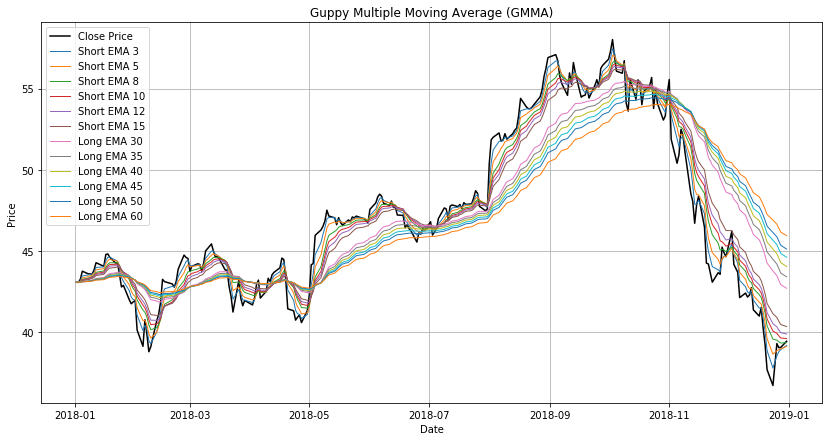

In [6]:
# Create the figure and subplots
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Close Price', color='black', linewidth=1.5)

# Plot short-term EMAs
for period in short_lookback_periods:
    plt.plot(df[f'Short EMA {period}'], label=f'Short EMA {period}', linewidth=1)

# Plot long-term EMAs
for period in long_lookback_periods:
    plt.plot(df[f'Long EMA {period}'], label=f'Long EMA {period}', linewidth=1)

plt.title('Guppy Multiple Moving Average (GMMA)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

## Candlestick with Guppy Multiple Moving Average 

In [7]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Short EMA 3,Short EMA 5,Short EMA 8,Short EMA 10,Short EMA 12,Short EMA 15,Long EMA 30,Long EMA 35,Long EMA 40,Long EMA 45,Long EMA 50,Long EMA 60,VolumePositive
0,736696.0,42.540001,43.075001,42.314999,43.064999,40.615883,102223600,43.064999,43.064999,43.064999,43.064999,43.064999,43.064999,43.064999,43.064999,43.064999,43.064999,43.064999,43.064999,False
1,736697.0,43.132500,43.637501,42.990002,43.057499,40.608822,118071600,43.061249,43.062499,43.063332,43.063635,43.063845,43.064061,43.064515,43.064582,43.064633,43.064673,43.064705,43.064753,False
2,736698.0,43.134998,43.367500,43.020000,43.257500,40.797443,89738400,43.159374,43.127499,43.106480,43.098883,43.093638,43.088241,43.076965,43.075300,43.074041,43.073056,43.072265,43.071072,False
3,736699.0,43.360001,43.842499,43.262501,43.750000,41.261936,94640000,43.454687,43.334999,43.249485,43.217268,43.194617,43.170961,43.120387,43.112783,43.107015,43.102489,43.098843,43.093332,False
4,736702.0,43.587502,43.902500,43.482498,43.587502,41.108677,82271200,43.521094,43.419167,43.324600,43.284583,43.255060,43.223028,43.150523,43.139156,43.130453,43.123576,43.118006,43.109535,False


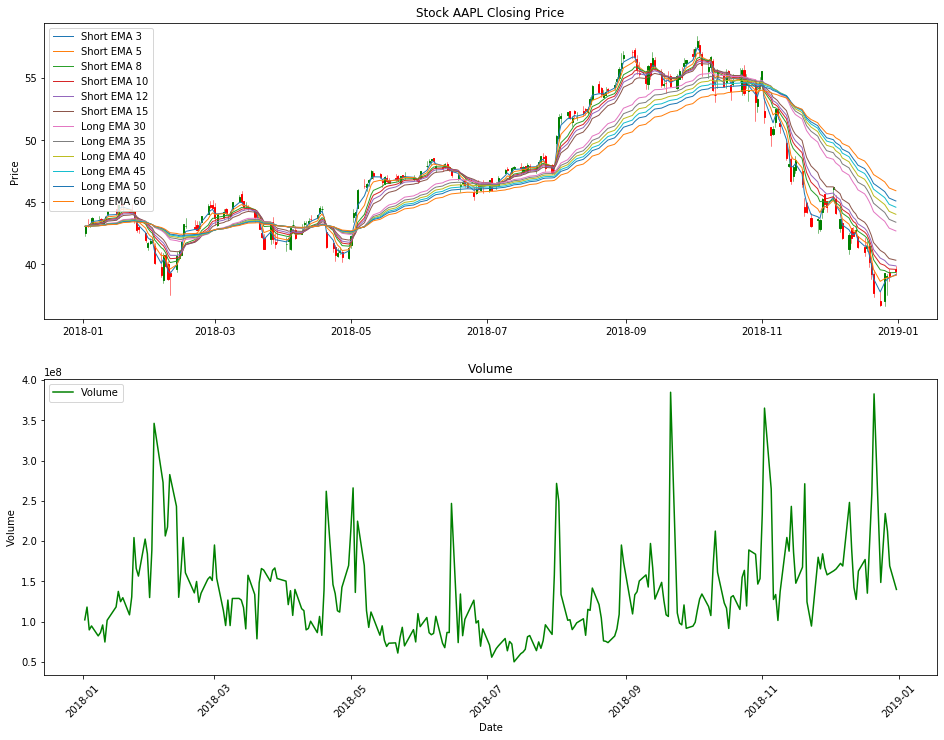

In [8]:
from mplfinance.original_flavor import candlestick_ohlc

fig = plt.figure(figsize=(16, 12))

# First subplot with candlestick chart and SMAs/EMAs
ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1, dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)

for period in short_lookback_periods:
    ax1.plot(df.index, df[f'Short EMA {period}'], label=f'Short EMA {period}', linewidth=1)

for period in long_lookback_periods:
    ax1.plot(df.index, df[f'Long EMA {period}'], label=f'Long EMA {period}', linewidth=1)

ax1.set_title('Stock ' + symbol + ' Closing Price')
ax1.set_ylabel('Price')
ax1.legend(loc='best')

# Second subplot with Volume
ax2 = plt.subplot(2, 1, 2)
ax2.plot(df.index, df['Volume'], label='Volume', color='green')
ax2.set_title('Volume')
ax2.set_ylabel('Volume')
ax2.set_xlabel('Date')
ax2.tick_params(axis='x', rotation=45)
ax2.legend(loc='best')

plt.show()